In [1]:
import pandas as pd

In [2]:
# Weather data from NOAA's "Data At a Glance"
tampa = pd.read_csv('TampaAvgHighsApr.csv')
tampa.head()

,Date,Value,Anomaly
0,193904,72.9,0.9
1,194004,69.2,-2.8
2,194104,71.5,-0.5
3,194204,70.4,-1.6
4,194304,71.5,-0.5


In [3]:
# Renaming columns for readability
tampa.columns = ['Year', 'Temperature', 'Anomaly']
tampa.head()

,Year,Temperature,Anomaly
0,193904,72.9,0.9
1,194004,69.2,-2.8
2,194104,71.5,-0.5
3,194204,70.4,-1.6
4,194304,71.5,-0.5


In [4]:
# Truncating last two digits of every value in 'Year' column
tampa.Year = tampa.Year.floordiv(100)
tampa.head()

,Year,Temperature,Anomaly
0,1939,72.9,0.9
1,1940,69.2,-2.8
2,1941,71.5,-0.5
3,1942,70.4,-1.6
4,1943,71.5,-0.5


In [5]:
# Basic statistics
pd.set_option('precision', 2)
tampa.Temperature.describe()

count    83.00
mean     72.52
std       2.37
min      66.40
25%      71.05
50%      72.60
75%      74.15
max      78.10
Name: Temperature, dtype: float64

In [6]:
# Calculate the regression line's slope and intercept using linregress
from scipy import stats
tampa_lr = stats.linregress(x=tampa.Year, y=tampa.Temperature)

In [7]:
tampa_lr.slope

0.027154611477267963

In [8]:
tampa_lr.intercept

18.751941564166053

In [9]:
# Function to estimate/predict temperatures
estimate = (lambda x: tampa_lr.slope * x + tampa_lr.intercept)

In [10]:
# Approximate temperature in 1989, actual value 71.8
estimate(1989)

72.76246379245202

In [11]:
# Predict temperature in 2040
estimate(2040)

74.14734897779269

(50.0, 90.0)

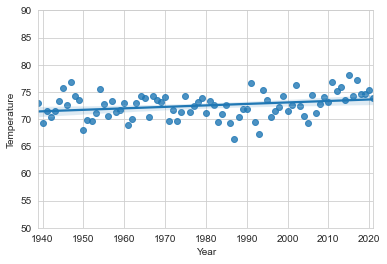

In [14]:
# Plot scatterplot using regplot
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=tampa.Year, y=tampa.Temperature)
axes.set_ylim(50, 90) # Emphasizes linear relationship